# Importações


In [245]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

##### Definição de MLP


In [ ]:
mlp_classifier = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "mlp",
            MLPClassifier(
                random_state=42,
                max_iter=1000,
                solver="sgd",
                hidden_layer_sizes=(100, 50),
                activation="tanh",
            ),
        ),
    ]
)

## Visualização do CSV de treino


In [247]:
trainFile = pandas.read_csv("treino.csv")
trainFile.head()

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,target
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962,2
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670,0
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217,0
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182,2
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524,3


## Visualização do CSV de teste


In [248]:
testFile = pandas.read_csv("teste.csv")
testFile.head()

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,2142,37.555079,3.205281,1.583984,11.330132,32.542511,6.581602,5.524091,5.202632,3.288405,3.009713,14.706292,20.530879,2.889453
1,3846,28.933095,3.905861,2.171001,14.644065,26.406560,9.515010,4.023027,6.528586,4.202300,2.281440,18.454367,14.862851,3.183574
2,6177,37.082903,3.259937,1.887675,12.313557,29.368109,6.533770,5.088085,5.913968,3.925079,2.619016,16.717026,16.871735,3.512345
3,11779,24.011327,4.599539,2.102587,17.349264,27.121683,12.231295,2.664319,5.226405,5.232794,2.996656,14.773491,9.133299,3.739929
4,1593,31.403592,2.543982,0.533288,14.778941,43.525198,5.225097,7.100292,4.516120,2.753415,3.386776,12.765727,16.675742,3.000528


# Gráficos


### Contagem dos planetas por tipo


- 0: Desert Planet
- 1: Volcanic Planet
- 2: Oceanic Planet
- 3: Forest Planet
- 4: Ice planet


<Axes: xlabel='target'>

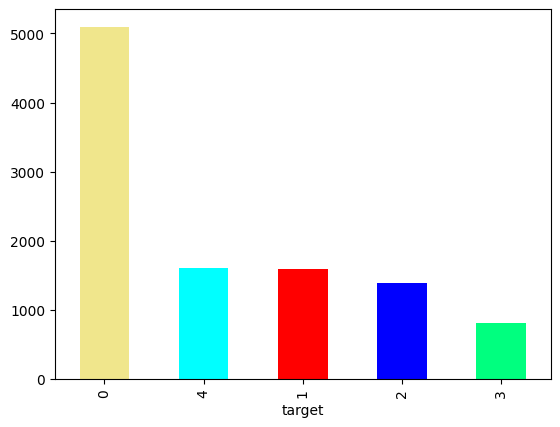

In [249]:
trainFile["target"].value_counts().plot(
    kind="bar", color=["Khaki", "aqua", "red", "blue", "SpringGreen"]
)

### Classificação dos planetas em função da vegetação e fauna


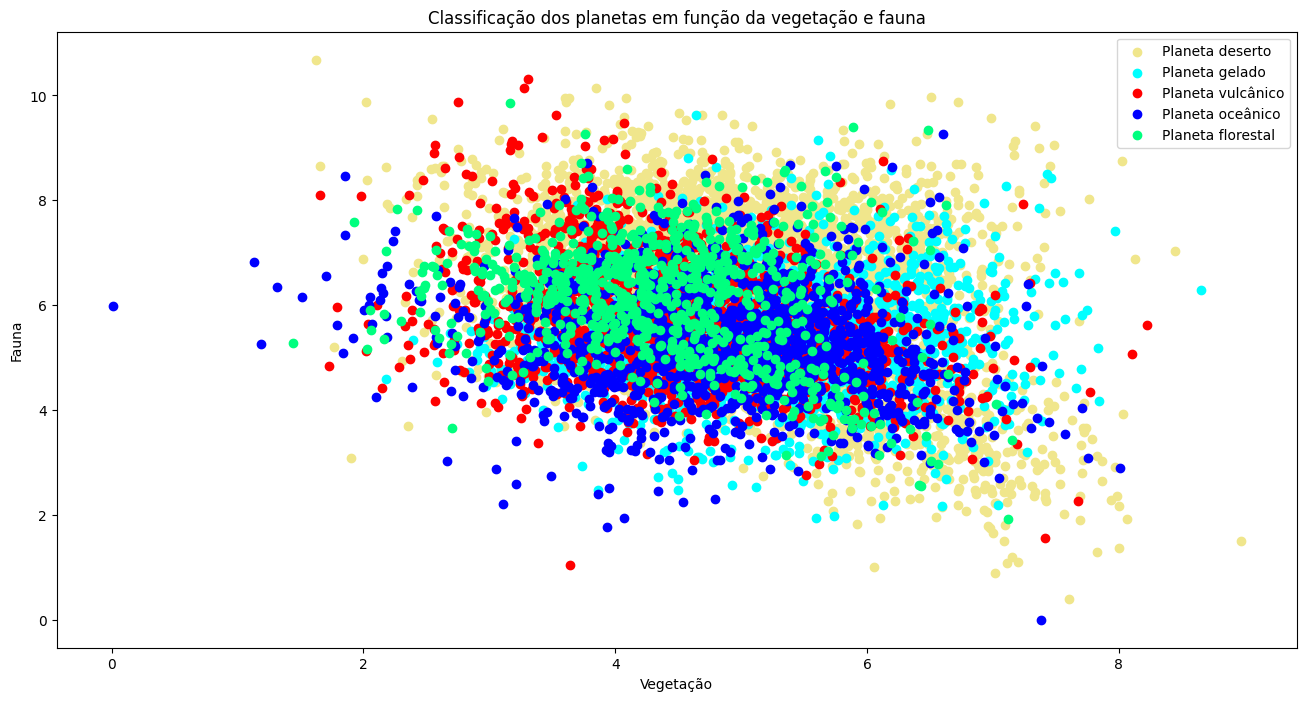

In [ ]:
plt.figure(figsize=(16, 8))

plt.scatter(
    trainFile["col_6"][trainFile["target"] == 0],
    trainFile["col_7"][trainFile["target"] == 0],
    c="Khaki",
)

plt.scatter(
    trainFile["col_6"][trainFile["target"] == 4],
    trainFile["col_7"][trainFile["target"] == 4],
    c="aqua",
)

plt.scatter(
    trainFile["col_6"][trainFile["target"] == 1],
    trainFile["col_7"][trainFile["target"] == 1],
    c="red",
)

plt.scatter(
    trainFile["col_6"][trainFile["target"] == 2],
    trainFile["col_7"][trainFile["target"] == 2],
    c="blue",
)

plt.scatter(
    trainFile["col_6"][trainFile["target"] == 3],
    trainFile["col_7"][trainFile["target"] == 3],
    c="SpringGreen",
)


plt.title("Classificação dos planetas em função da vegetação e fauna")
plt.xlabel("Vegetação")
plt.legend(
    [
        "Planeta deserto",
        "Planeta gelado",
        "Planeta vulcânico",
        "Planeta oceânico",
        "Planeta florestal",
    ]
)
plt.ylabel("Fauna")

### Classificação dos planetas em função da gravidade e radiação


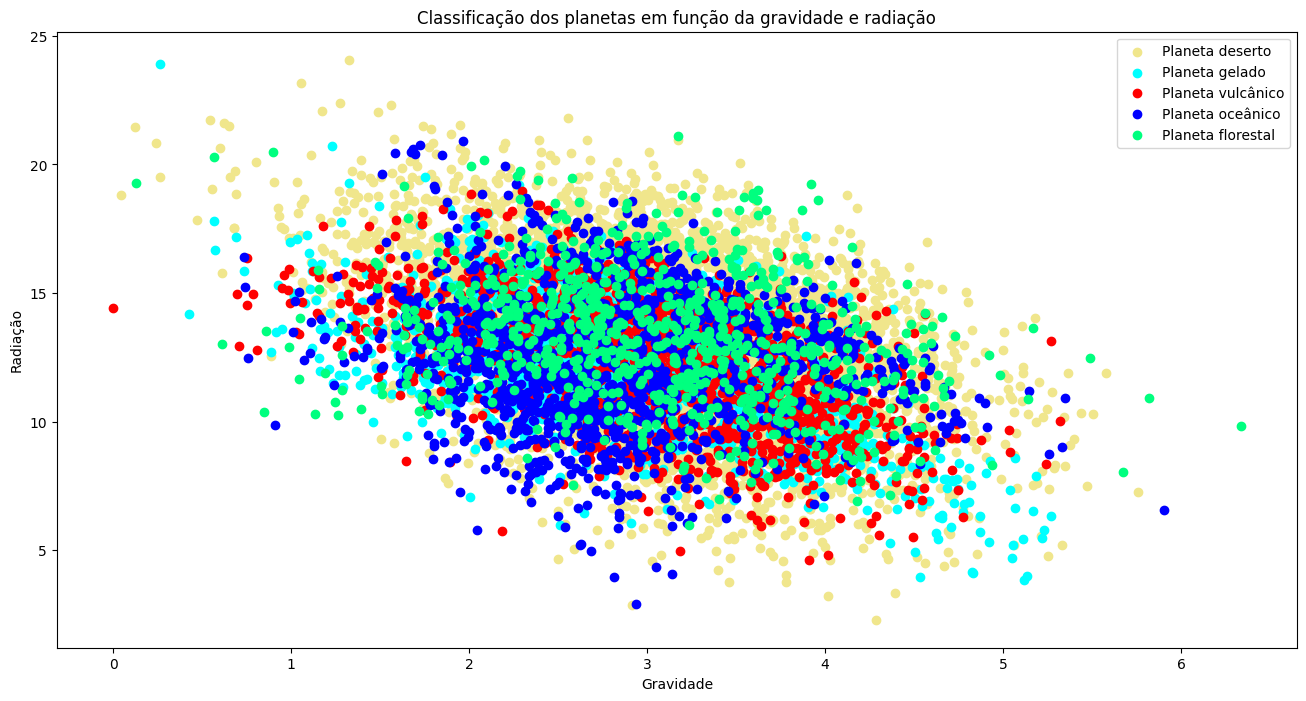

In [ ]:
plt.figure(figsize=(16, 8))

plt.scatter(
    trainFile["col_1"][trainFile["target"] == 0],
    trainFile["col_3"][trainFile["target"] == 0],
    c="Khaki",
)

plt.scatter(
    trainFile["col_1"][trainFile["target"] == 4],
    trainFile["col_3"][trainFile["target"] == 4],
    c="aqua",
)

plt.scatter(
    trainFile["col_1"][trainFile["target"] == 1],
    trainFile["col_3"][trainFile["target"] == 1],
    c="red",
)

plt.scatter(
    trainFile["col_1"][trainFile["target"] == 2],
    trainFile["col_3"][trainFile["target"] == 2],
    c="blue",
)

plt.scatter(
    trainFile["col_1"][trainFile["target"] == 3],
    trainFile["col_3"][trainFile["target"] == 3],
    c="SpringGreen",
)


plt.title("Classificação dos planetas em função da gravidade e radiação")
plt.xlabel("Gravidade")
plt.legend(
    [
        "Planeta deserto",
        "Planeta gelado",
        "Planeta vulcânico",
        "Planeta oceânico",
        "Planeta florestal",
    ]
)
plt.ylabel("Radiação")

### Média dos valores de "Solo fértil" por tipo de planeta

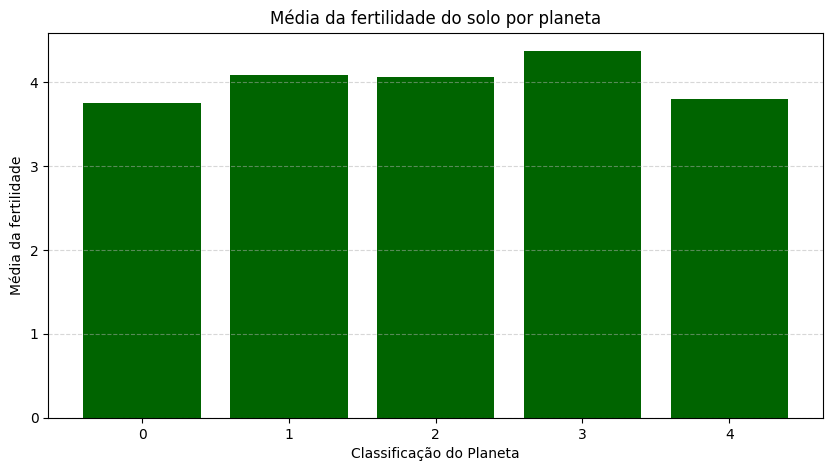

In [ ]:
fertility_avarage = trainFile.groupby("target")["col_8"].mean().sort_index()

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.bar(fertility_avarage.index, fertility_avarage.values, color='darkgreen')
plt.xlabel("Classificação do Planeta")
plt.ylabel("Média da fertilidade")
plt.title("Média da fertilidade do solo por planeta")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Média dos valores de "Luas" por tipo de planeta

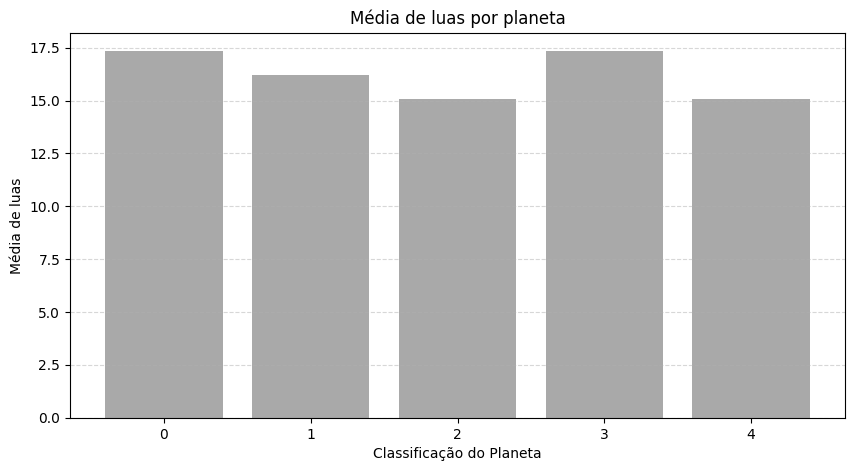

In [270]:
moons_avarage = trainFile.groupby("target")["col_10"].mean().sort_index()

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.bar(moons_avarage.index, moons_avarage.values, color='darkgrey')
plt.xlabel("Classificação do Planeta")
plt.ylabel("Média de luas")
plt.title("Média de luas por planeta")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Modelagem dos dados


In [252]:
trainFile.isnull().sum()

id        0
col_0     0
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
target    0
dtype: int64

In [253]:
X = trainFile.drop("target", axis=1)
y = trainFile["target"]

In [254]:
X.head()

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524


In [255]:
y.head()

0    2
1    0
2    0
3    2
4    3
Name: target, dtype: int64

# Treino e teste


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test)

(8400, 2100)

In [ ]:
models = {
    "Optimized Random Forest": RandomForestClassifier(
        random_state=42, n_estimators=500, bootstrap=False
    ),
    "Default Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP Classifier": mlp_classifier,
}


def fit_and_score(models, X_train, y_train):
    model_scores = {}
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=5)
        model_scores[name] = scores.mean()
    return model_scores


model_scores = fit_and_score(models=models, X_train=X_train, y_train=y_train)

### Score de cada modelo


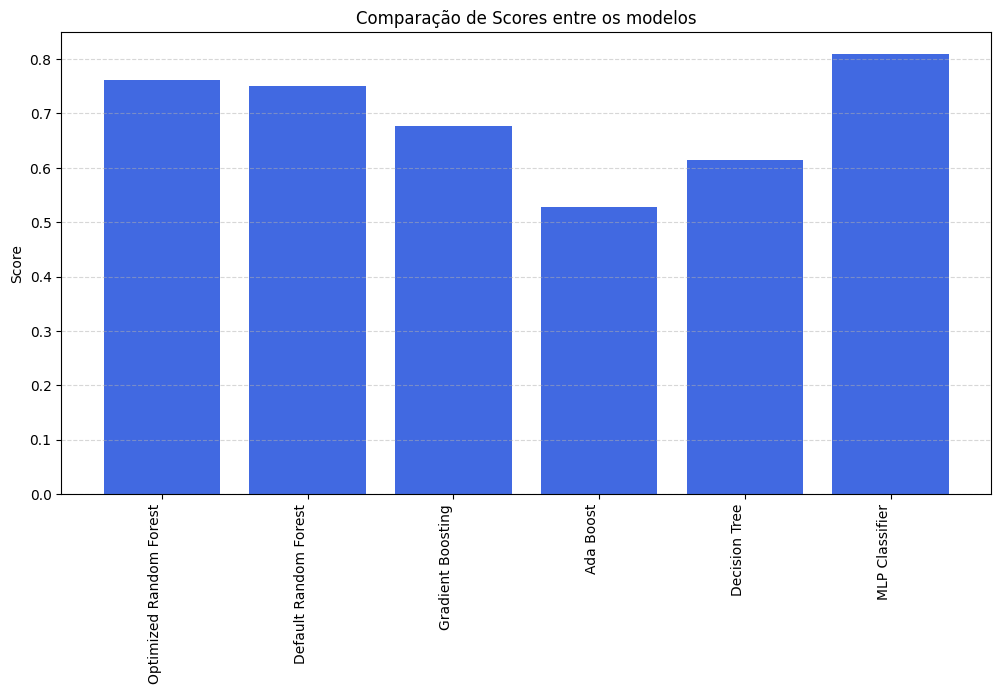

In [258]:
plt.figure(figsize=(12, 6))
plt.bar(model_scores.keys(), model_scores.values(), color="royalblue")
plt.xticks(rotation=90, ha="right")
plt.ylabel("Score")
plt.title("Comparação de Scores entre os modelos")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()